# 9.2 Multi-output and multi-layer models

In our previous notebook, we explored the basics with a simple neural network regressor (Linear regression) and classifier (Logistic regression), each implemented as a single artificial neuron.

Now, we're ready to raise the bar and venture into more complex network architectures. In this notebook, we'll get hands-on with:

* __multi-output single layer perceptron__ to obtain a multi-label linear classification model
* __multi-layer perceptron__ to create a non-linear classification model.


## Multi-label linear classification
<img src="https://drive.google.com/uc?export=view&id=1QSv6KAj0mJWqcjJREAYeSGLwZJk65Do-" width = "300" style="float: right;">

A single layer perceptron consists of multiple neurons organised in one layer. These  neurons  share  the  same  input  features,  but  each  of  them  produces a different output. The outputs of the linear layer for each neuron $z_k=\sum_jw_{jk}x_j$ are either passed through the same activation function $f(z)$, or in case of multi-label classification through a shared **softmax** activation function:
$$ \hat{p}_k=\frac{e^z_k}{\sum_{j=1}^Ke^z_{j}}$$

The linear multi-label classification is implemented with a **single linear layer**, with
* the number of **inputs** equal to the number of **features**
* the number of **outputs** equal to the number of **classes**

For example, if we would like to predict no, mild moderate and severe heart failure from EF and GLS, we need two inputs and three outputs, as implemented in the cell below.

## An analogy

Think of a single layer perceptron as a busy, bustling kitchen of a restaurant. Each neuron in this case is like a chef. All the chefs are stationed in one line (the layer), forming the kitchen brigade.

Even though all chefs start with the same ingredients (the input features), each one creates a unique dish (the different output).

Consider the preparation of each dish by the chef as the linear layer for each neuron, represented by

$z_k=\sum_jw_{jk}x_j$.

The prepared dishes (outputs) are then presented (passed through an **activation function $f(z)$** for inspection and finishing touches.

However, if we're considering a multi-course meal (analogous to multi-label classification), each dish gets a shared final touch, similar to a shared **softmax activation function**:

$$ \hat{p}_k=\frac{e^z_k}{\sum_{j=1}^Ke^z_{j}}$$

This entire culinary experience can be thought of as a linear multi-label classification. It's implemented with a single pass through the kitchen** (linear layer). Here's how it's organized:**

The number of **ingredients (inputs)** is equal to the number of **dish elements (features)**,
The number of final **dishes (outputs)** is equal to the number of **course options (classes)**.

For example, if we wanted to prepare a variety of meals from certain ingredients, we'd need several ingredients (inputs) and several final dishes (outputs). This is the basic setup in our culinary adventure, much like in the implementation of a single layer perceptron.

In [ ]:
import torch
from torch import nn
l = nn.Linear(2,3)
print(l)

Linear(in_features=2, out_features=3, bias=True)


Guess what? We're going to use a built-in PyTorch function called `CrossEntropyLoss` to set our loss. What's neat about this function is it rolls the **softmax function** and **cross-entropy** loss all into one! That's pretty handy because it means we don't need to add the activation function in our network separately.

But here's the interesting bit - for the sake of numerical stability, PyTorch actually calculates log-softmax first, and then follows it up with negative log-likelihood loss. So, while it might seem a bit different, it's actually doing the same job as combining softmax with cross-entropy loss, but in a safer and more efficient way!

In [ ]:
loss_function = nn.CrossEntropyLoss()

## Exercise 2: Multi-label linear classifier

Now we're going to take things up a level and create a multi-label classifier with PyTorch. Our goal is to predict different stages of heart failure - no, mild, moderate, and severe - based on EF and GLS.

The code below does a few things for us. It's going to load and plot our data, and then it will transform the data into PyTorch tensors.

Just a heads up! Make sure your input features are `float` type, while your output labels should be `long`. It's one of those little details that can make a big difference.

In [ ]:
# only do this if you work on Google Colab
# run the cell
# then upload file 'heart_failure_data_complete.csv'

from google.colab import files
files.upload()

Saving heart_failure_data_complete.csv to heart_failure_data_complete (1).csv


{'heart_failure_data_complete.csv': b'HF,EF,GLS,QRS\r\n0,50.9222797927,-19.57,88\r\n0,54.601226993900006,-19.0,86\r\n0,50.0,-21.0,99\r\n0,50.8196721311,-18.74,85\r\n0,53.1914893617,-19.78,86\r\n0,54.1436464088,-18.37,87\r\n0,54.5,-20.19,88\r\n0,54.7169811321,-20.65,81\r\n0,54.8387096774,-20.18,99\r\n0,54.938271604899995,-21.04,83\r\n0,45.1948051948,-21.17,84\r\n0,55.2380952381,-20.83,90\r\n0,55.4621848739,-17.58,118\r\n0,55.4655870445,-18.72,87\r\n0,55.609756097600005,-15.37,88\r\n0,55.652173913,-26.07,88\r\n0,55.652173913,-14.78,93\r\n0,55.8823529412,-20.74,88\r\n0,56.25,-20.11,90\r\n0,56.5789473684,-19.63,80\r\n0,56.8,-20.01,85\r\n0,56.8720379147,-18.13,97\r\n0,56.923076923100005,-23.57,94\r\n0,57.03125,-24.67,100\r\n0,57.1428571429,-21.07,89\r\n0,57.1428571429,-13.53,94\r\n0,57.219251336899994,-20.34,100\r\n0,48.322147651,-21.37,93\r\n0,57.3964497041,-21.43,85\r\n0,57.7464788732,-18.48,89\r\n0,48.2159624413,-23.8,102\r\n0,58.7786259542,-16.05,86\r\n0,58.940397351,-20.73,101\r\n0,49.

X:  torch.Size([120, 2])
y:  torch.Size([120])


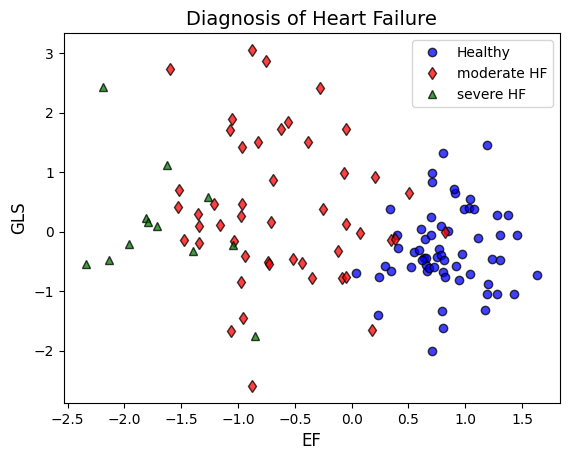

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('heart_failure_data_complete.csv')
data = df.to_numpy()
X = data[:,[1,2]]
X = StandardScaler().fit_transform(X)
y = data[:,0]

def PlotData(X,y,fontsize=12):
    plt.plot(X[y==0,0],X[y==0,1],'bo',alpha=0.75,markeredgecolor='k',label = 'Healthy')
    plt.plot(X[y==1,0],X[y==1,1],'rd',alpha=0.75,markeredgecolor='k',label = 'moderate HF')
    plt.plot(X[y==2,0],X[y==2,1],'g^',alpha=0.75,markeredgecolor='k',label = 'severe HF')
    plt.title('Diagnosis of Heart Failure', fontsize = fontsize+2)
    plt.xlabel('EF', fontsize = fontsize)
    plt.ylabel('GLS', fontsize = fontsize)
    plt.legend(fontsize = fontsize-2)

PlotData(X,y)

# convert numpy array to tensor in shape of input size
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).long()
print('X: ', X.shape)
print('y: ', y.shape)

Below is the function to plot the classification result. Run the code.

### Train test split
**Task 2.1:** First, split the data into training set and test set. For this, we will use scikit-learn `train_test_split`.

Fun fact: this function works just as well on Pytorch tensors as it does on numpy arrays. Set it up so we use 33% of our data for testing. And one more thing - pay attention to the types of the split datasets once they're ready. Your turn to code!

In [ ]:
def PlotClassification(net,X,y,fontsize=12):

    # Create an 1D array of samples for each feature
    x1 = np.linspace(-2.5, 2, 1000)
    x2 = np.linspace(-3, 3.5, 1000).T # note the transpose
    # Creates 2D arrays that hold the coordinates in 2D feature space
    x1, x2 = np.meshgrid(x1, x2)
    # Flatten x1 and x2 to 1D vector and concatenate into a feature matrix
    Feature_space = np.c_[x1.ravel(), x2.ravel()]

    # NEW: convert numpy to torch
    Feature_space = torch.from_numpy(Feature_space).float()
    # NEW: Predict output scores for the whole feature space
    output_scores = net(Feature_space)
    # NEW: Take maximum to get the labels
    _,y_pred=torch.max(output_scores, 1)
    # NEW: Convert to numpy
    y_pred = y_pred.numpy()

    # Resahpe to 2D
    y_pred = y_pred.reshape(x1.shape)
    # Plot using contourf
    plt.contourf(x1, x2, y_pred, cmap = 'summer')

    # Plot data
    PlotData(X,y,fontsize)

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = None
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Test features type:', X_test.type())
print('Test labels type:', y_test.type())
print('Test labels:', y_test)

Test features type: torch.FloatTensor
Test labels type: torch.LongTensor
Test labels: tensor([0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0])


### Create and train the network
**Task 2.2:** Your next task is to create and train a multi-label classification model in Pytorch.

Be mindful that we want to train our network using only the training data. Start filling in the code in the provided cells. It's time to let your Pytorch skills shine!

In [ ]:
# network architecture
class MultiLabelClassifier(nn.Module):
    def __init__(self):
        super(MultiLabelClassifier, self).__init__()
        self.layer = None

    def forward(self, x):
        x = None
        return x

# create model
net = MultiLabelClassifier()

# loss
loss_function = None

# optimiser
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)

# train for 500 epochs
epochs = 500
for i in range(epochs):
    optimizer.zero_grad()
    prediction = None
    loss = loss_function(prediction, None)
    loss.backward()
    optimizer.step()

# Plot result
PlotClassification(net,None,None)

### Evaluate training accuracy

Alright, now that we've done the training, it's time to put our network to the test. We're going to see how well it can predict the labels on the test set. Because we combined the softmax function and cross-entropy loss, our network will produce three outputs for each sample. These outputs, which come straight from the linear layer, correspond to the three classes we're dealing with. We often call these outputs **logits**.

To see this in action, let's test our network on a single feature vector - we'll go with $x=(0,0)$ for simplicity. Let's see what our network comes up with!

In [ ]:
# create a feature vector of correct shape and type
x = torch.tensor((0,0)).reshape(1,2).float()
# predict using forward pass
z = net(x)
# print logits
print('Logits: ', z)

In order to predict the class for this datapoint, we're essentially going to turn this into a competition: the class that produces the highest logit is declared the winner! In other words, we will determine the predicted label by seeing which class returns the maximum logit value. Let's find out which class that is:

In [ ]:
y = torch.argmax(z, dim=1)
print('Predicted label: ', y)

**Task 2.3:** Fill in the code to predict the labels for the training set

Alright, to make predictions for all samples in the training set, we will follow these steps:

1.   Feed all samples through the network to produce the logits.
2.   For each sample, find out which class returned the highest logit.

In [ ]:
# forward pass
pred=None
# find maximum
y_pred_train = None
print(y_pred_train)

Unfortunately, Pytorch doesn't provide built-in functions to compute performance metrics. However, there's no need to worry! We can conveniently use Scikit-learn's `accuracy_score` function to evaluate our model's performance. It works well with Pytorch, and provides a straightforward way to calculate the accuracy of our predictions.

In [ ]:
from sklearn.metrics import accuracy_score
print('Training accuracy: ', accuracy_score(y_train, y_pred_train))

### Evaluate on test set

Okay, it's time to see how our model performs on unseen data! So, are you ready to test your code-writing abilities? This is task 2.3, let's go!

**Task 2.3:**

- Predict the logits for the test set - this means we'll run our test data through the network.
- Change these logits into labels. Remember, a label is just the final predicted category our model thinks is the most likely.
- Calculate the accuracy score for these predictions on our test set. This tells us how well our model did at predicting the correct labels.
- Last but not least, let's visualize our classification results on the test set. It's always fun to see our model's work in a neat graph!

To evaluate accuracy on the test set, implement the following:

* predict the logits for the test set by running a forward pass through the network
* convert logits to label
* calculate test accuracy score
* plot the classification result for the test set

In [ ]:
# forward pass
pred=None

# find maximum
y_pred_test = None

# calculate accuracy
print('Test accuracy: ', None)

# plot


## Multi-layer perceptron for non-linear classification

<img src="https://drive.google.com/uc?export=view&id=11LbuuVbmGbKksiMu4Q-bTNwTmjssPELv" width = "350" style="float: right;">

Alright! Time to venture deeper into the world of fascinating neural networks.

You see, what makes neural networks so adaptable and powerful is their ability to combine a ton of artificial neurons into a single machine learning model. This model is organized in layers, each containing multiple neurons. This layered setup leads to what we call a** multi-layer perceptron** model.

Now, imagine we have a tower of stacked pancakes, each pancake being a layer of neurons. If we add a little something extra, say syrup (our non-linear activation functions), between these pancakes (layers), we end up with a much tastier (more flexible) model!

A network made up of several such layers is also known as a **fully connected deep neural network**. And it's as impressive as it sounds!

Take a look at the image on the right. It shows a two-layer network, the kind we're going to build to create a** non-linear binary classifier**.

Our classifier will have two input features. The first linear layer (the bottom pancake) will have two inputs and six outputs. More outputs mean we'll have more flexibility to fit a highly **non-linear decision boundary**. The six outputs from this layer will become inputs for the second layer, which only has one output.

Now, remember the syrup I mentioned? That's our **ReLU activation function**, adding that sweet non-linearity after the first layer. And after the second layer, we have the **Sigmoid activation** to give us a binary classifier.

So let's get going and see how this network performs!


## Exercise 3: Non-linear classifier

 Ready for the next adventure? In this exercise, we're going to turn up the heat a notch and take on a multi-layer perceptron. And here's the fun part - we're going to apply it to a simulated dataset that has two concentric circles.

 Just go ahead and run the cell below to generate and visualize the dataset.

In [ ]:
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=500,factor=0.5, noise=0.08)

X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape(-1,1)).float()
print('X: ', X.shape)
print('y: ', y.shape)

def PlotData2(X,y):
    y=y.flatten()
    plt.plot(X[y==0,0],X[y==0,1],'bo',alpha=0.75,markeredgecolor='k')
    plt.plot(X[y==1,0],X[y==1,1],'rd',alpha=0.75,markeredgecolor='k')
    plt.axis('equal')
    plt.title('Circles', fontsize = 14)
    #plt.axis('off')

plt.figure(figsize = (5,5))
PlotData2(X,y)

We need a slightly different function to plot the classification result, run the code below.

In [ ]:
def PlotClassification2(net,X,y):

    # Create an 1D array of samples for each feature
    a = 0.2
    x1 = np.linspace(X[:,0].min()-a, X[:,0].max()+a, 1000)
    x2 = np.linspace(X[:,1].min()-a, X[:,1].max()+a, 1000).T # note the transpose
    # Creates 2D arrays that hold the coordinates in 2D feature space
    x1, x2 = np.meshgrid(x1, x2)
    # Flatten x1 and x2 to 1D vector and concatenate into a feature matrix
    Feature_space = np.c_[x1.ravel(), x2.ravel()]

    # NEW: convert numpy to torch
    Feature_space = torch.from_numpy(Feature_space).float()
    # NEW: Predict output scores for the whole feature space
    output_scores = net(Feature_space)
    # NEW: Threshold output scores
    y_pred = (output_scores>0.5).long()

    # Resahpe to 2D
    y_pred = y_pred.reshape(x1.shape)
    # Plot using contourf
    plt.contourf(x1, x2, y_pred, cmap = 'summer')

    # Plot data
    PlotData2(X,y)
    plt.axis('off')

**Task 3.1:** In the cell below is a working code to fit a single-layer perceptron to the dataset. Just run the cell below and see how it performs. What do you observe? Is the classifier suitable for the dataset? Can this classifier handle the dataset effectively?

**Answer:**

**Task 3.2:** We are going to enhance our classifier to better fit this non-linear dataset. Your mission is to modify the network architecture so that it can fit this non-linear dataset. Specifically, within the `__init__` function:

* develop a linear `layer1` with two inputs and 6 outputs
* Implement a `ReLU` activation function to add non-linearity.
* Add another linear `layer2` that takes in 6 inputs from `layer1` and returns one output.
* `Wrap it up with a `Sigmoid` activation function to finalize our binary classifier.

Once you've done that, don't forget to adjust the `forward` function to reflect your changes. Run the cell to train your improved classifier and visualize the results. Happy coding!

In [ ]:
class MLPClassifier(nn.Module):
    def __init__(self):
        super(MLPClassifier, self).__init__()
        self.layer1 = nn.Linear(2, 1)
        #self.relu = nn.ReLU()
        #self.layer2 = None
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        return x

def train(net, X, y):
    loss_function = nn.BCELoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=0.2, momentum=0.75)
    epochs = 500
    for i in range(epochs):
        optimizer.zero_grad()
        prediction = net(X)
        loss = loss_function(prediction, y)
        loss.backward()
        optimizer.step()
    return net

net2 = MLPClassifier()
train(net2,X,y)
PlotClassification2(net2,X,y)

**Task 3.3 (optional):** Simulate an additional dataset to create an independent test set. Calculate **accuracy** on this dataset.

If you're up for an additional challenge, let's create an independent test set to validate our classifier's performance further. Here's how:

- Simulate a fresh dataset that matches the original one in structure but with unique instances. This new dataset will serve as our independent test set.
- Use your trained classifier to predict the labels for this test set.
- Calculate the accuracy of these predictions against the actual labels of the test set.

This way, we'll get a clearer picture of how well our classifier performs on unseen data. Enjoy exploring this further!

In [ ]:
# simulate test set
X_test, y_test = make_circles(n_samples=500,factor=0.5, noise=0.08)

# convert to tensors
X_test =None
y_test = None
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

In [ ]:
# predict probabilities for class 1
pred = None

# threshold to create labels
y_pred_test = None

# calculate accuracy
